# CRISP-DM: Cross-Industry Standard Process for Data Mining

CRISP-DM es un proceso estándar para la minería de datos que se utiliza para guiar a los profesionales de datos a través de la implementación de proyectos de minería de datos. Consiste en seis fases principales: comprensión del negocio, comprensión de los datos, preparación de los datos, modelado, evaluación y despliegue. En este notebook, se aplicará el proceso CRISP-DM a un problema de clasificación de quiebra empresarial utilizando un conjunto de datos financiero. La fuente de datos y significado de las variables se encuentra en el archivo README.md.

## 1. Entendimiento de negocio

### Objetivo de negocio
El objetivo de negocio es predecir la probabilidad de quiebra de una empresa utilizando datos financieros históricos. Esta predicción permitirá a las empresas y a los inversores tomar decisiones informadas sobre la gestión de riesgos y la asignación de recursos, mejorando así la estabilidad financiera y la rentabilidad.

### Objetivo analítico
El objetivo analítico es construir un modelo de machine learning que pueda clasificar si una empresa se declarará en quiebra o no, basado en las características financieras proporcionadas en el dataset. El modelo debe ser preciso y robusto, capaz de manejar datos financieros complejos y proporcionar predicciones confiables.

## 2. Entendimiento de los datos

### Análisis univariante y bivariante

Para entender mejor los datos, realizaremos un análisis univariante y bivariante utilizando Python. Esto incluirá la visualización de distribuciones de variables individuales y la relación entre pares de variables. También realizaremos algunas transformaciones de datos si es necesario.

Primero, cargaremos los datos y realizaremos un análisis univariante.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Cargar los datos
data = pd.read_csv('Taller2_data.csv')

# Mostrar las primeras filas del dataset
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [3]:
# Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Vemos que todas nuestras variables son numéricas, por lo que no necesitamos hacer ninguna transformación adicional.

In [4]:
data.shape

(6819, 96)

El dataset contiene 6819 registros y 96 variables, incluyendo una variable objetivo 'Bankrupt?' que indica si la empresa se declaró en quiebra o no. A continuación, realizaremos un análisis univariante y bivariante de los datos.

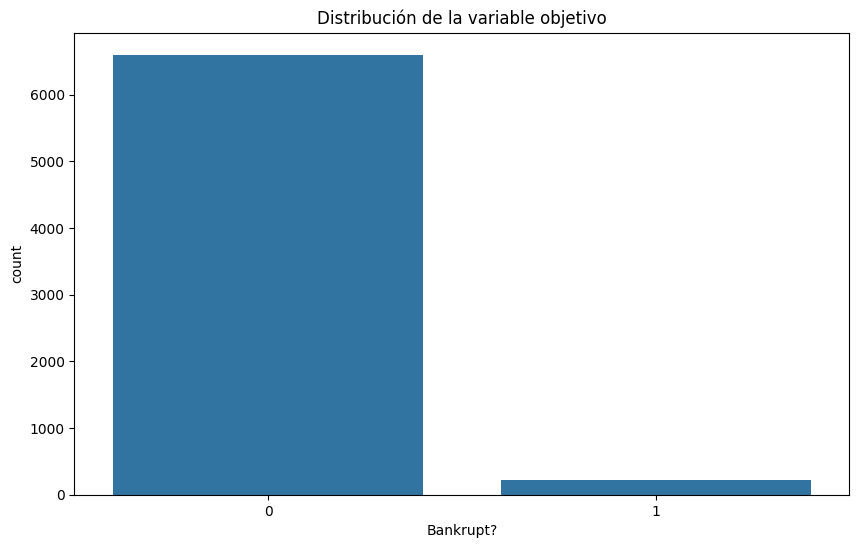

In [5]:
# Análisis univariante
# Histograma de la variable objetivo
plt.figure(figsize=(10, 6))
sns.countplot(x='Bankrupt?', data=data)
plt.title('Distribución de la variable objetivo')
plt.show()

La variable objetivo 'Bankrupt?' es binaria, con la mayoría de las empresas no declaradas en quiebra, esta bastante desbalanceada. 
A continuación, visualizaremos las distribuciones de las variables financieras.

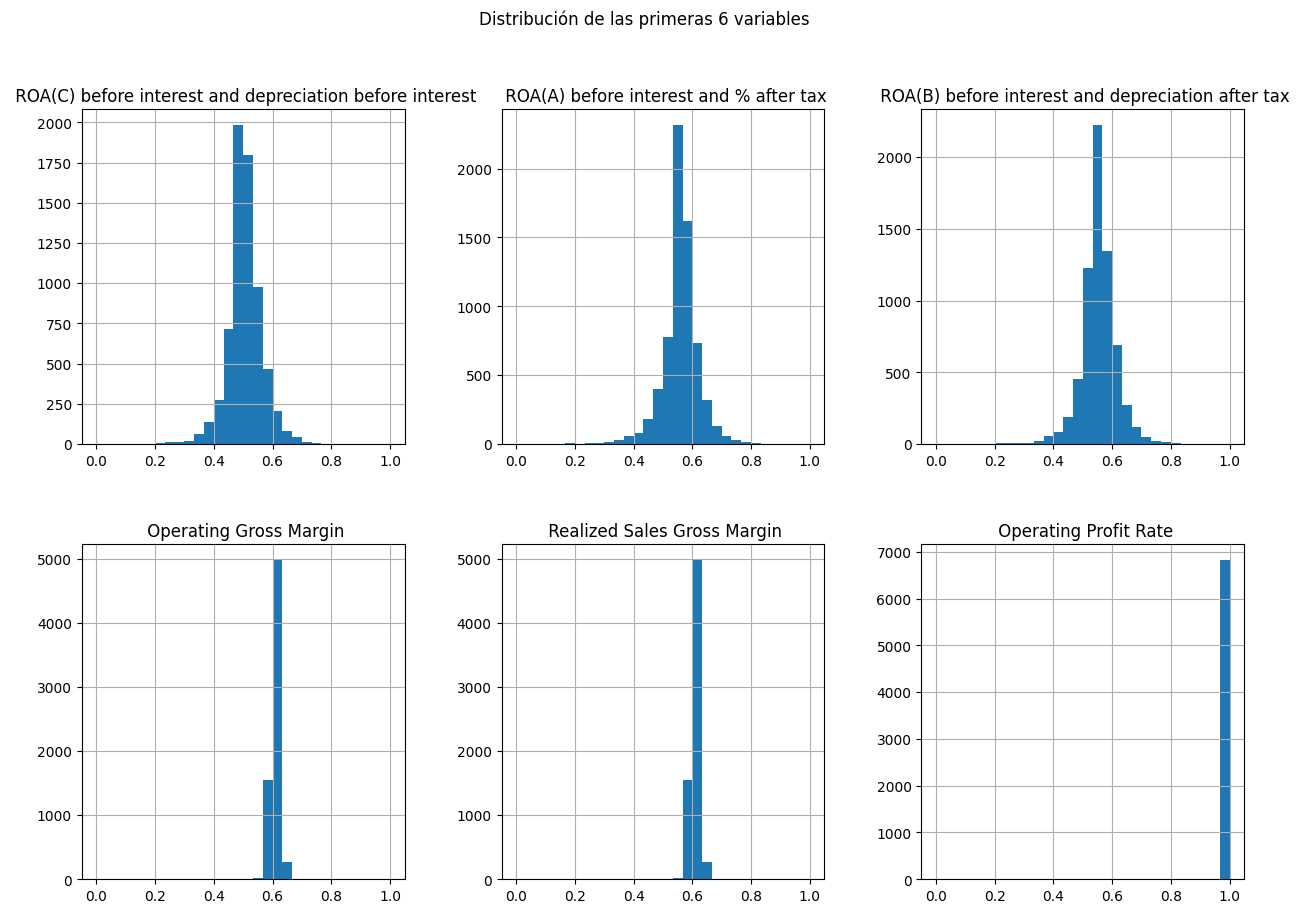

In [6]:
# Histograma de las primeras 6 variables
data.iloc[:, 1:7].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribución de las primeras 6 variables')
plt.show()

A continuación, realizaremos un análisis bivariante para entender las relaciones entre las variables.

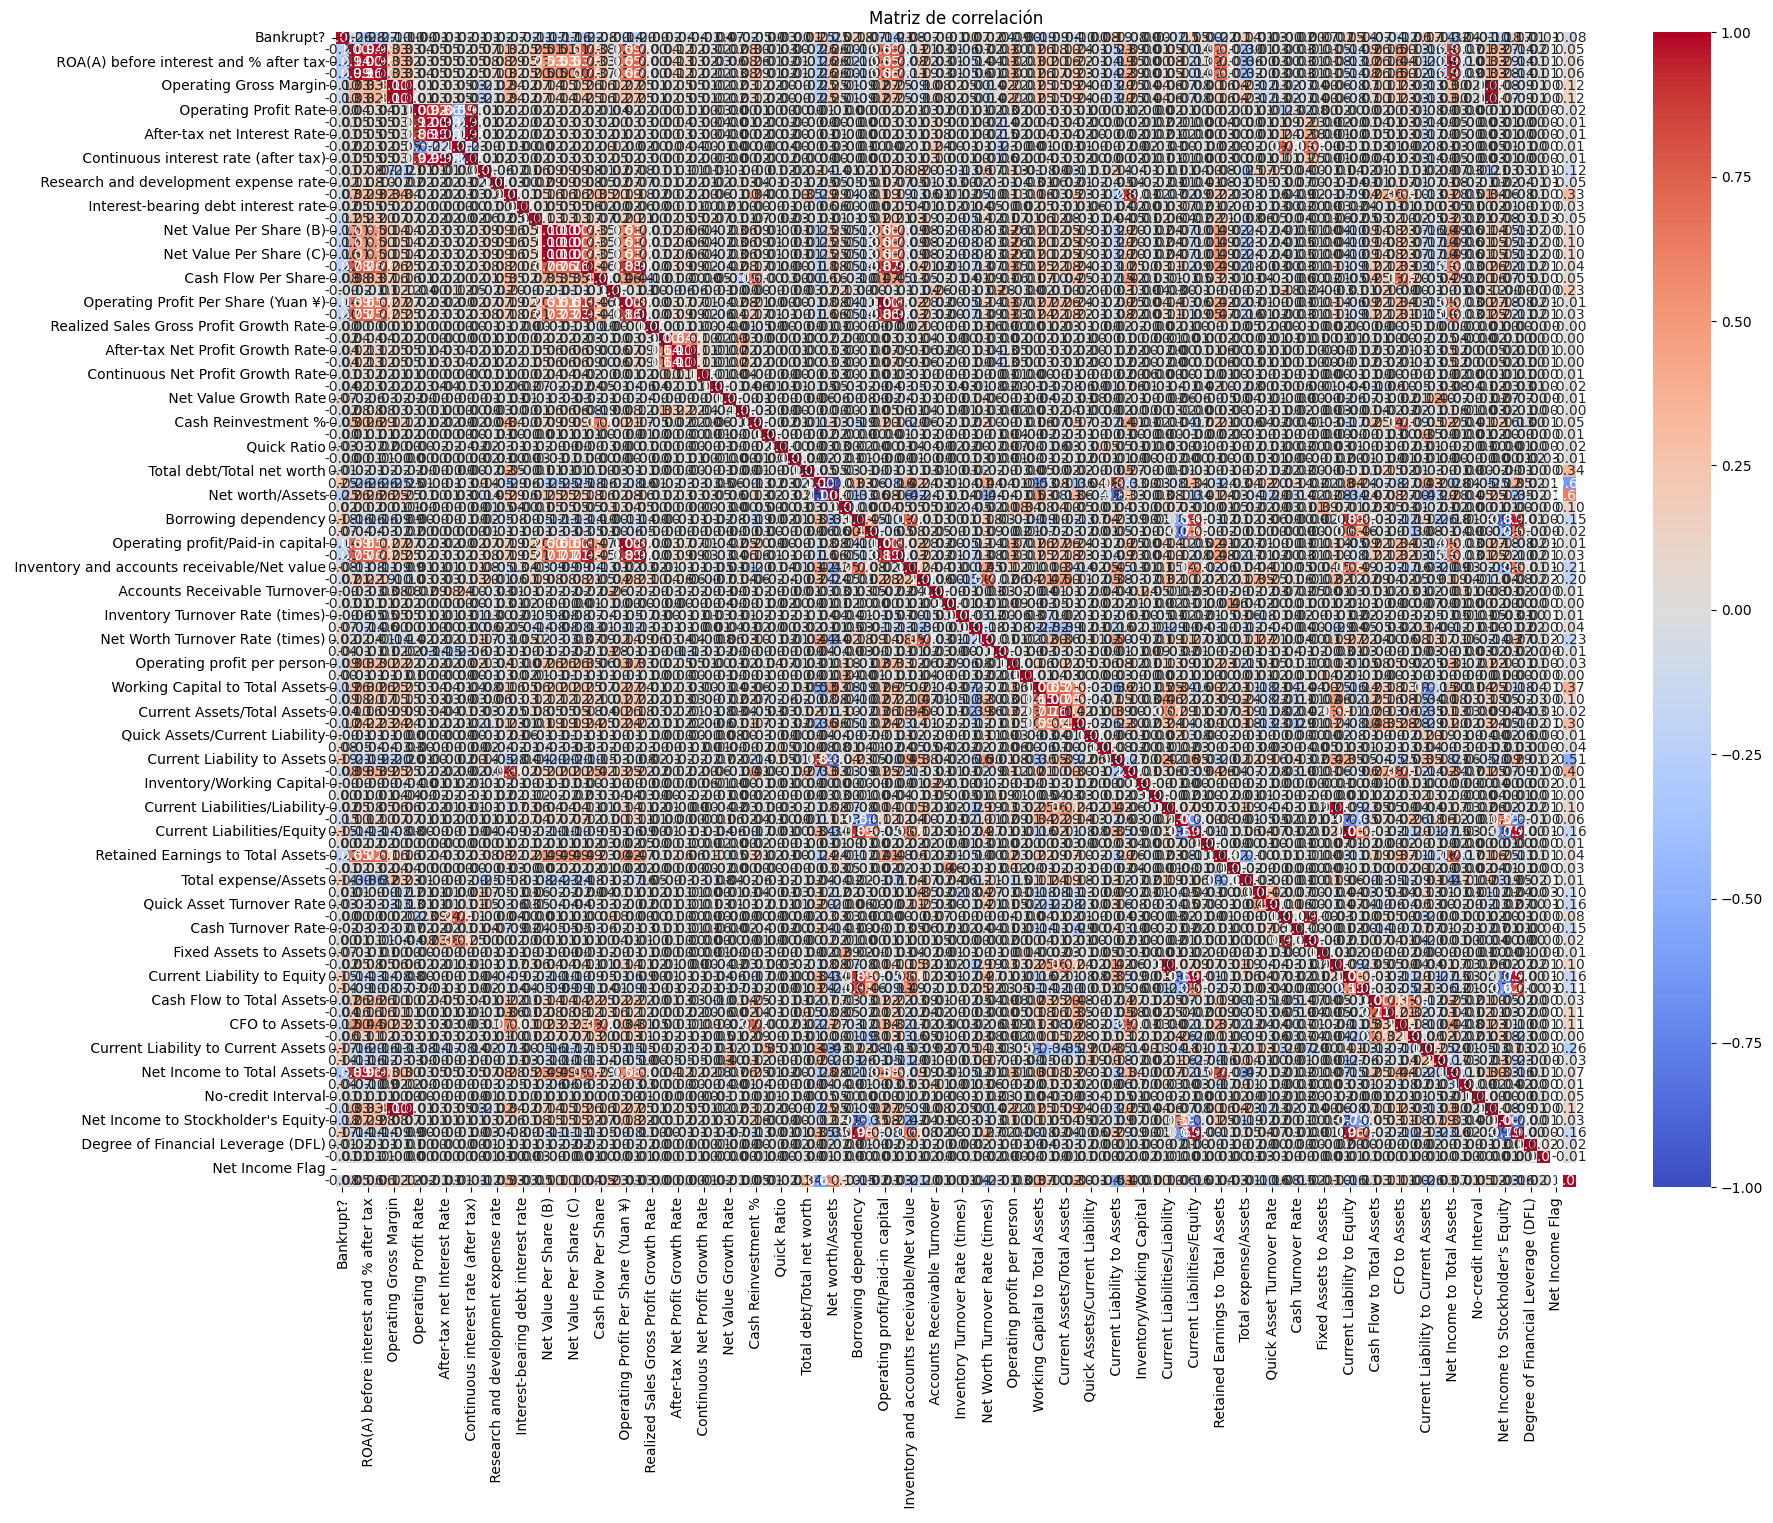

In [7]:
# Análisis bivariante
# Matriz de correlación
plt.figure(figsize=(20, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

La matriz de correlación nos muestra las relaciones lineales entre las variables. En este caso son muchas variables, por lo que la matriz es difícil de interpretar. A continuación, sacaremos las variables mas significativas a la variable objetivo, basandonos en el valor P y la correlación.

In [8]:
# Calcular los valores p
def calculate_p_values(data):
    p_values = pd.Series(index=data.columns)
    for column in data.columns:
        if column != 'Bankrupt?':
            try:
                model = sm.Logit(data['Bankrupt?'], sm.add_constant(data[column]))
                result = model.fit(disp=0)
                if len(result.pvalues) > 1:
                    p_values[column] = result.pvalues.iloc[1]  # Use iloc to access by position
                else:
                    p_values[column] = None  # Handle the case where pvalues does not have the expected length
            except np.linalg.LinAlgError:
                p_values[column] = None  # Skip columns that cause singular matrix error
    return p_values

In [9]:
# Función para seleccionar variables basadas en múltiples criterios
def select_significant_variables(correlation_with_target, p_values, correlation_matrix, correlation_threshold, p_value_threshold, correlation_threshold_between_predictors):
    significant_variables = correlation_with_target[correlation_with_target > correlation_threshold].index
    significant_variables = significant_variables.intersection(p_values[p_values < p_value_threshold].index)

    # Eliminar variables altamente correlacionadas entre sí
    to_remove = set()
    for i in range(len(significant_variables)):
        for j in range(i + 1, len(significant_variables)):
            if abs(correlation_matrix.loc[significant_variables[i], significant_variables[j]]) > correlation_threshold_between_predictors:
                to_remove.add(significant_variables[j])
    significant_variables = [var for var in significant_variables if var not in to_remove]

    return significant_variables

In [23]:
# Normalizar los datos, excluyendo la variable objetivo
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop(columns=['Bankrupt?'])), columns=data.columns.drop('Bankrupt?'))
data_scaled['Bankrupt?'] = data['Bankrupt?']  # Añadir la variable objetivo sin normalizar
data_scaled.head()

ROA(C) before interest and depreciation before interest  \
0                                          -2.217909          
1                                          -0.673828          
2                                          -1.303672          
3                                          -1.735886          
4                                          -0.661778          

    ROA(A) before interest and % after tax  \
0                                -2.045798   
1                                -0.311068   
2                                -0.908420   
3                                -1.636209   
4                                -0.307745   

    ROA(B) before interest and depreciation after tax  \
0                                          -2.400361    
1                                          -0.598450    
2                                          -1.319910    
3                                          -1.556340    
4                                          -0.508050    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.383334                     -0.382638   
1                 0.135068                      0.136307   
2                -0.383759                     -0.388177   
3                -1.441418                     -1.441832   
4                -0.541238                     -0.540708   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.016456                   -0.023516   
1                0.014671                    0.014799   
2                0.007858                   -0.061111   
3               -0.004257                   -0.017313   
4                0.016758                    0.013703   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                     -0.020165                                     -0.087479   
1                      0.015966                                     -0.005957   
2                     -0.051183                                     -0.142238   
3                     -0.008676                                     -0.024491   
4                      0.016186                                     -0.013254   

    Continuous interest rate (after tax)  ...   Total assets to GNP price  \
0                              -0.031281  ...                   -0.049491   
1                               0.009823  ...                   -0.049491   
2                              -0.086566  ...                   -0.049491   
3                              -0.011077  ...                   -0.049491   
4                               0.013300  ...                   -0.049491   

    No-credit Interval   Gross Profit to Sales  \
0            -0.084274               -0.383465   
1            -0.021388                0.135253   
2            -0.005984               -0.383698   
3            -0.080226               -1.441526   
4            -0.032052               -0.541255   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                            -0.861611              0.680171   
1                            -0.029804              0.240685   
2                            -0.249820              0.679247   
3                            -0.392864              0.093765   
4                            -0.029564             -0.128014   

    Degree of Financial Leverage (DFL)  \
0                            -0.060031   
1                            15.129816   
2                            -0.062961   
3                            -0.053903   
4                            -0.178037   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                          -0.098978                 0.0   
1                                           0.364559                 0.0   
2                                          -0.125015                 0.0   
3                                          -0.052562                 0.0   
4                               

In [11]:
# Calcular la correlación de todas las variables con la variable objetivo
correlation_with_target = data_scaled.corr()['Bankrupt?'].abs().sort_values(ascending=False)

# Calcular los valores p
p_values = calculate_p_values(data_scaled)

In [24]:
correlation_with_target.head()

Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
Name: Bankrupt?, dtype: float64

In [25]:
p_values.head()

ROA(C) before interest and depreciation before interest    1.862659e-67
ROA(A) before interest and % after tax                     1.135077e-66
ROA(B) before interest and depreciation after tax          1.429465e-66
Operating Gross Margin                                     2.485134e-07
Realized Sales Gross Margin                                3.293540e-07
dtype: float64

In [14]:
# Seleccionar variables basadas en múltiples criterios
correlation_threshold = 0.1
p_value_threshold = 0.05
correlation_threshold_between_predictors = 0.8
significant_variables = select_significant_variables(correlation_with_target, p_values, data.corr(), correlation_threshold, p_value_threshold, correlation_threshold_between_predictors)

In [26]:
# Seleccionar las 10 variables más significativas (excluyendo la variable objetivo)
top_variables = significant_variables[:12]
top_variables

[' Net Income to Total Assets',
 ' Debt ratio %',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Working Capital to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Current Liability to Current Assets',
 ' Net Value Per Share (A)',
 ' Working Capital/Equity',
 ' Liability-Assets Flag',
 ' Total expense/Assets',
 ' CFO to Assets']

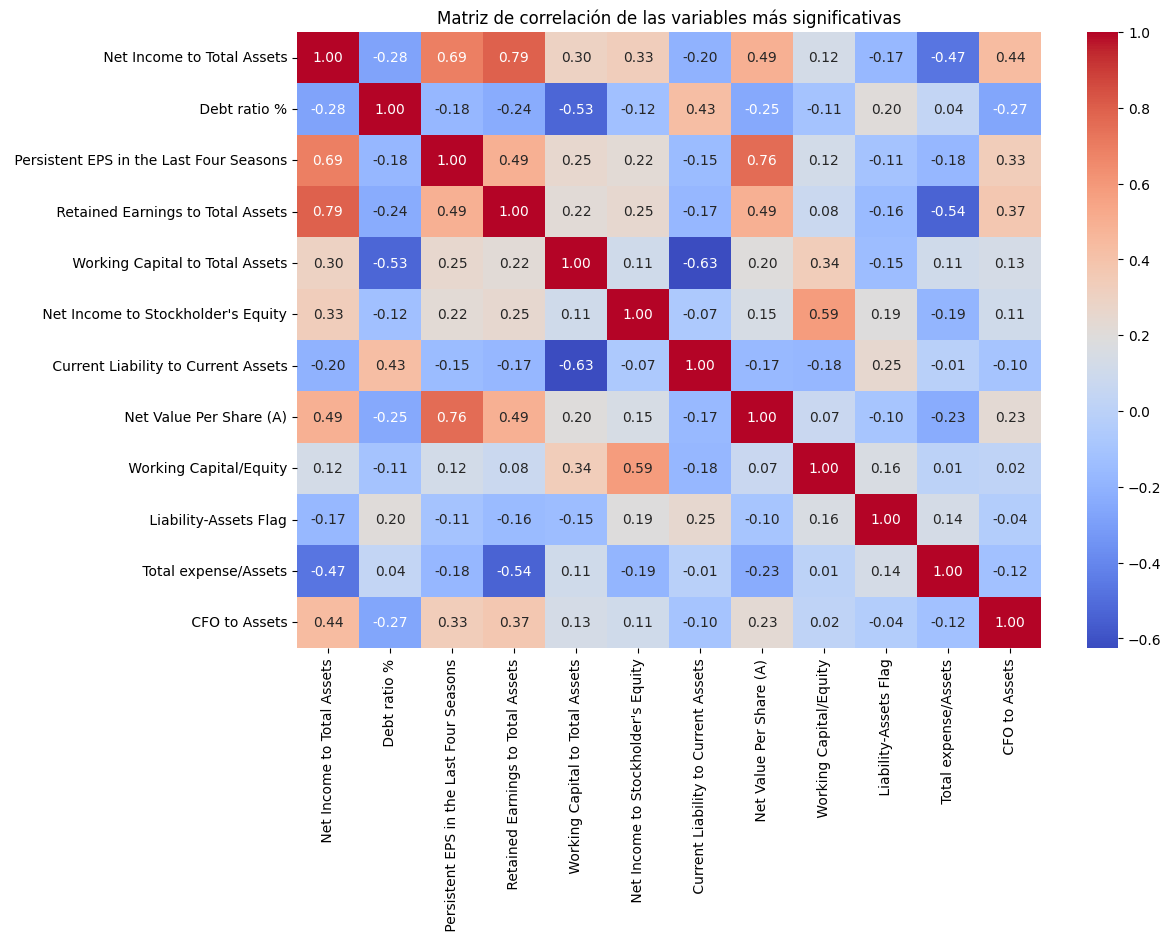

In [16]:
# Crear una matriz de correlación con estas variables
top_correlation_matrix = data[top_variables].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(top_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación de las variables más significativas')
plt.show()

A continuación, visualizaremos algunas relaciones no lineales utilizando gráficas de dispersión.

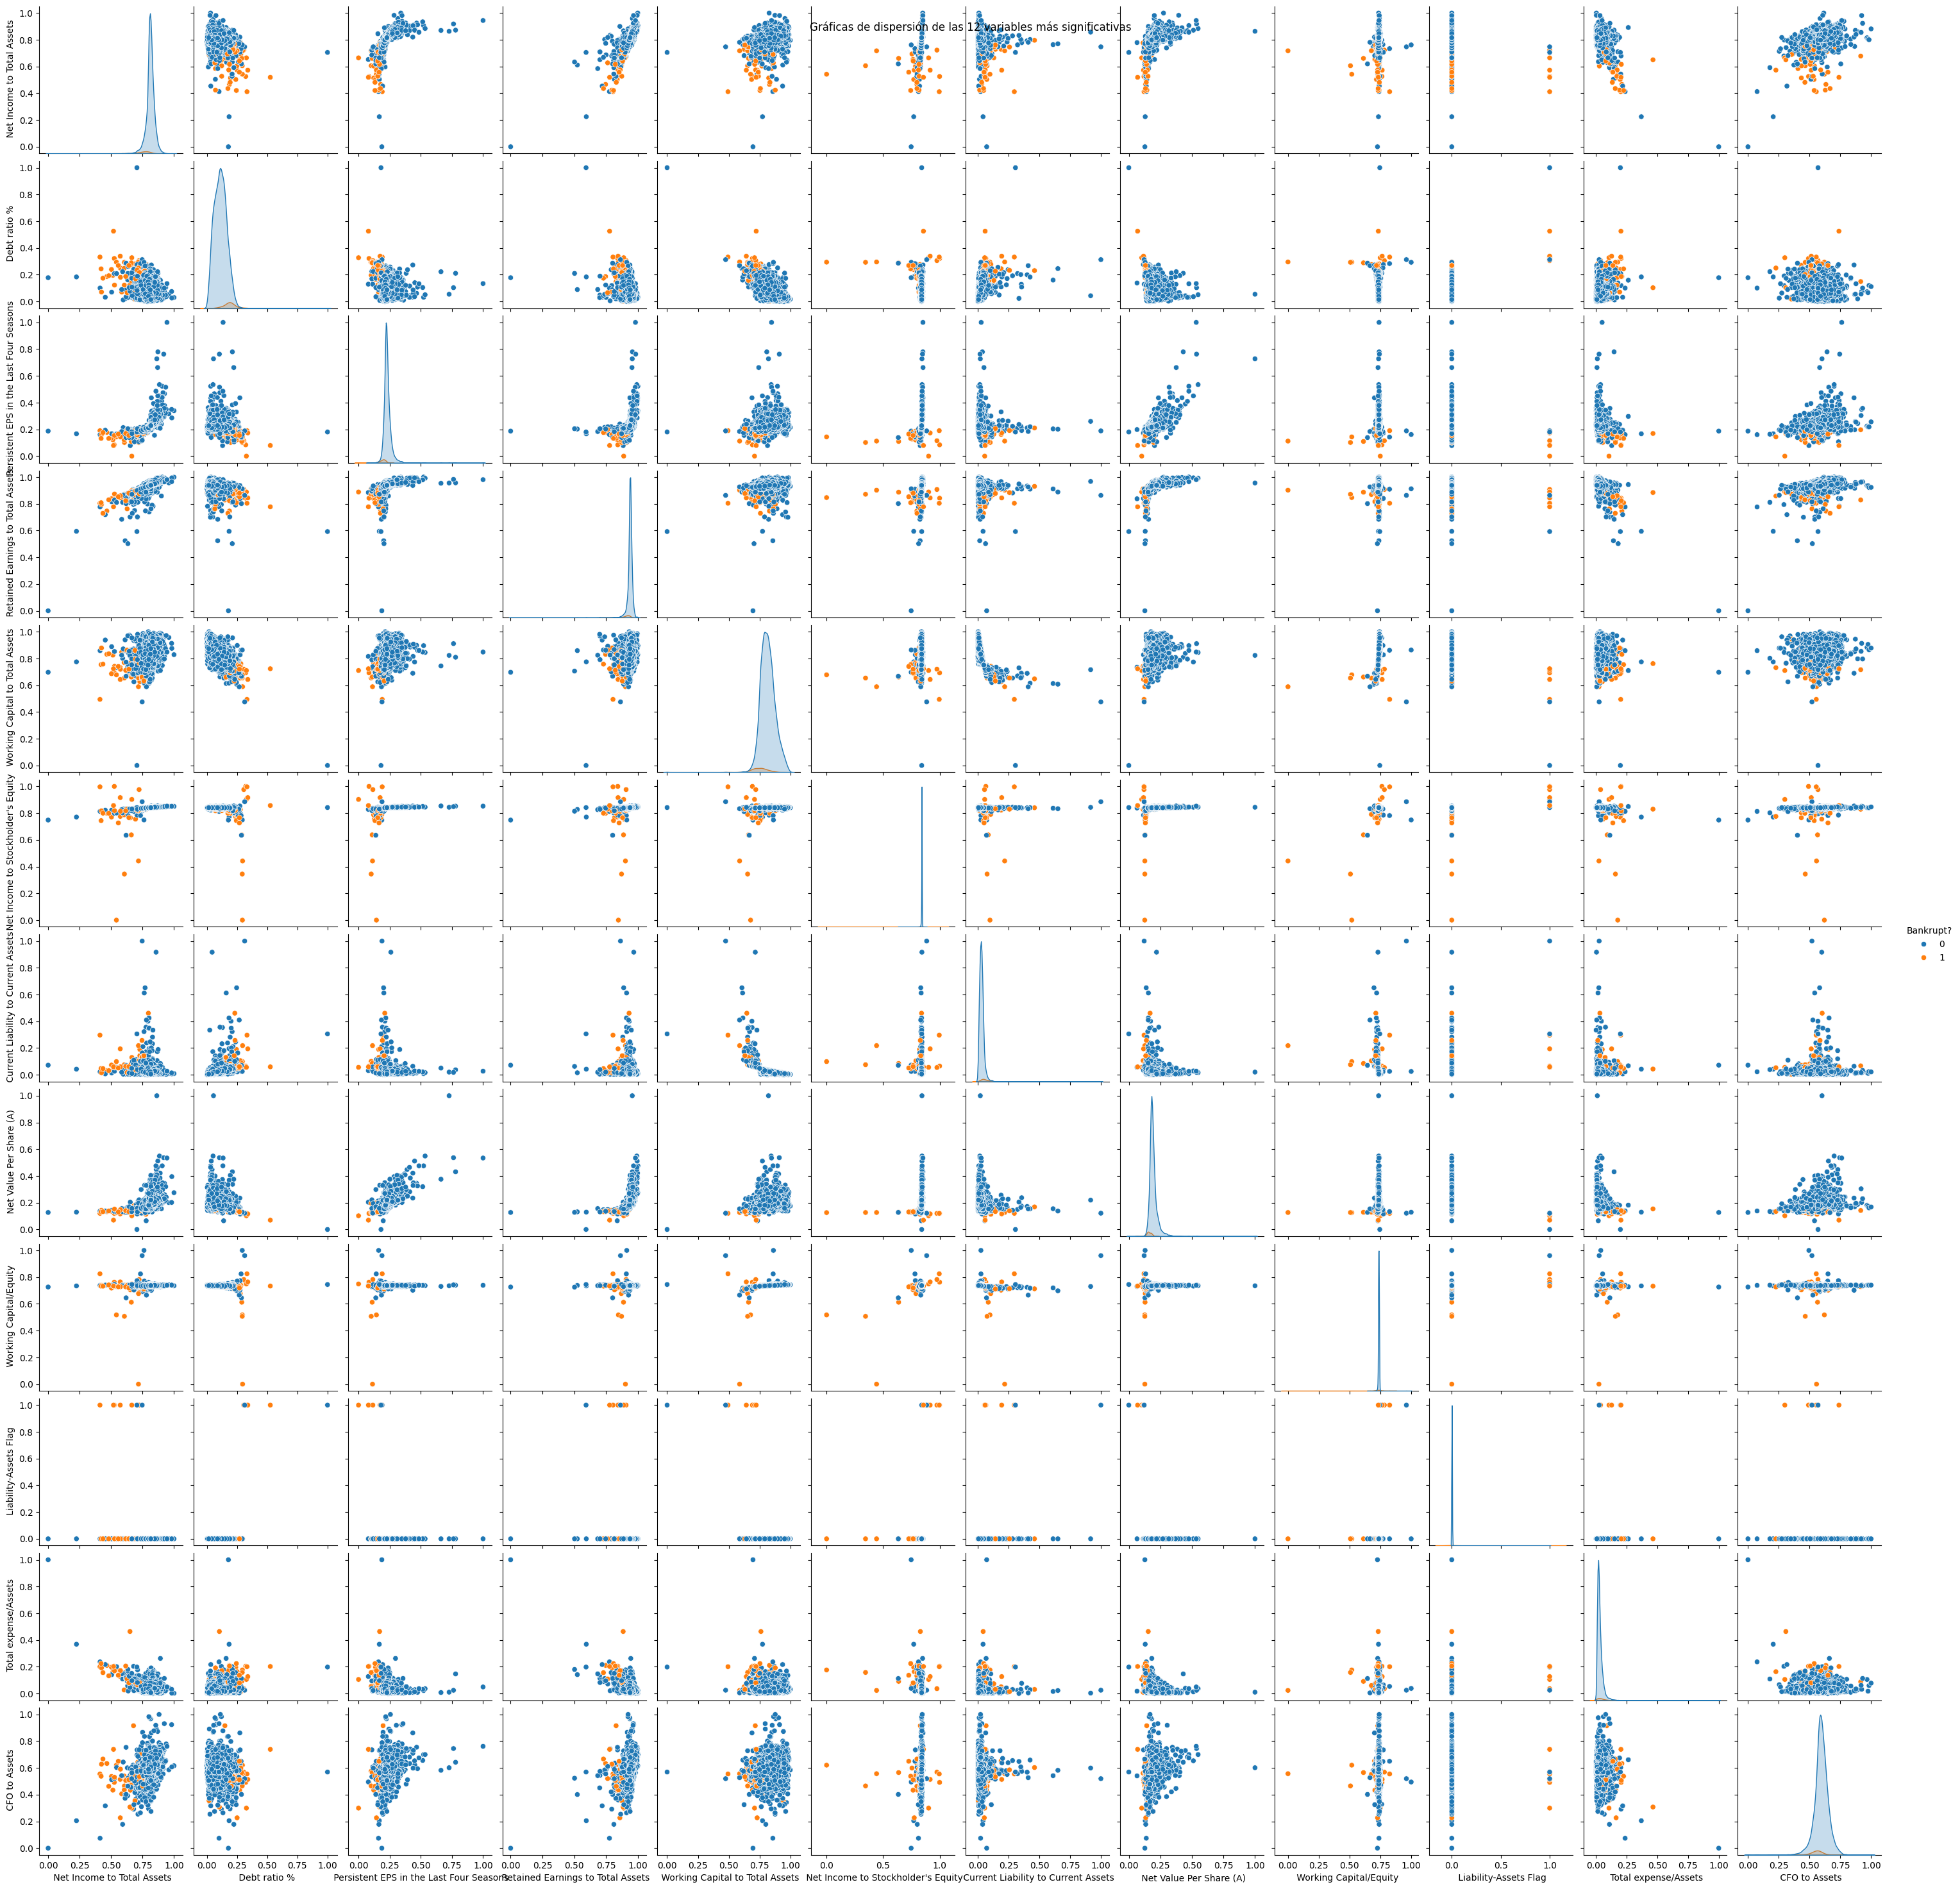

In [17]:
# Gráficas de dispersión para las 12 variables más significativas sin normalizar
sns.pairplot(data[top_variables + ['Bankrupt?']], hue='Bankrupt?')
plt.suptitle('Gráficas de dispersión de las 12 variables más significativas')
plt.show()

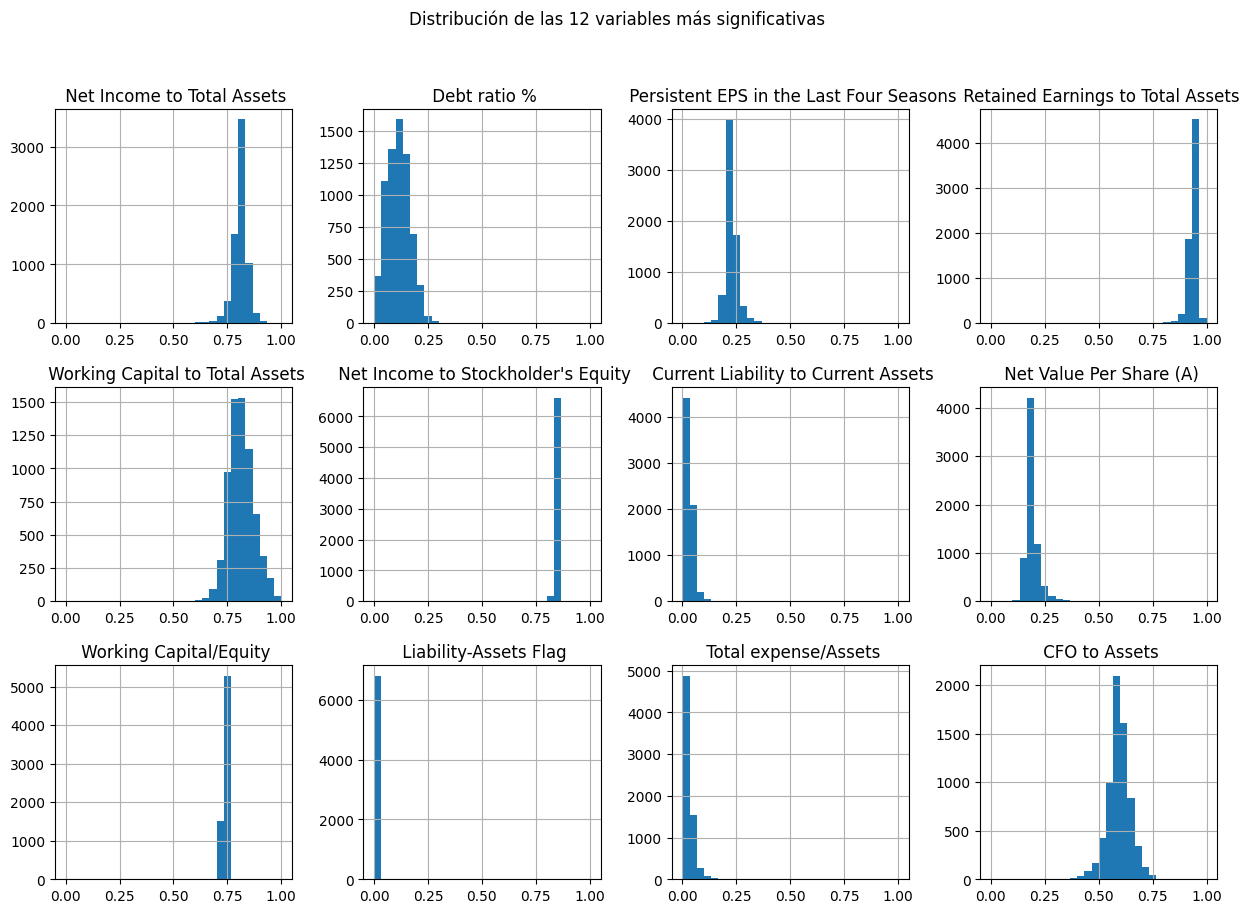

In [18]:
# Histograma de las 12 variables más significativas sin normalizar
data[top_variables].hist(bins=30, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Distribución de las 12 variables más significativas')
plt.show()


### Transformaciones de datos

Este proceso de exploración nos ayudará a entender mejor los datos y a preparar el dataset para el modelado.

#### Manejo de Valores Faltantes

##### Detección e Imputación de Valores Faltantes

Comenzamos identificando los valores faltantes en el conjunto de datos.

In [19]:
# Identificar valores faltantes
data.isnull().sum().sort_values(ascending=False) # Imprime la cantidad de valores faltantes por columna

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Vemos que nuestro dataset contiene 0 valores faltantes. No es necesaria la imputación de valores faltantes.

#### Visualización de Outliers: Box Plots y Histograms

Los gráficos de caja proporcionan una representación visual de la distribución de los datos, mostrando cuartiles, mediana y valores atípicos.

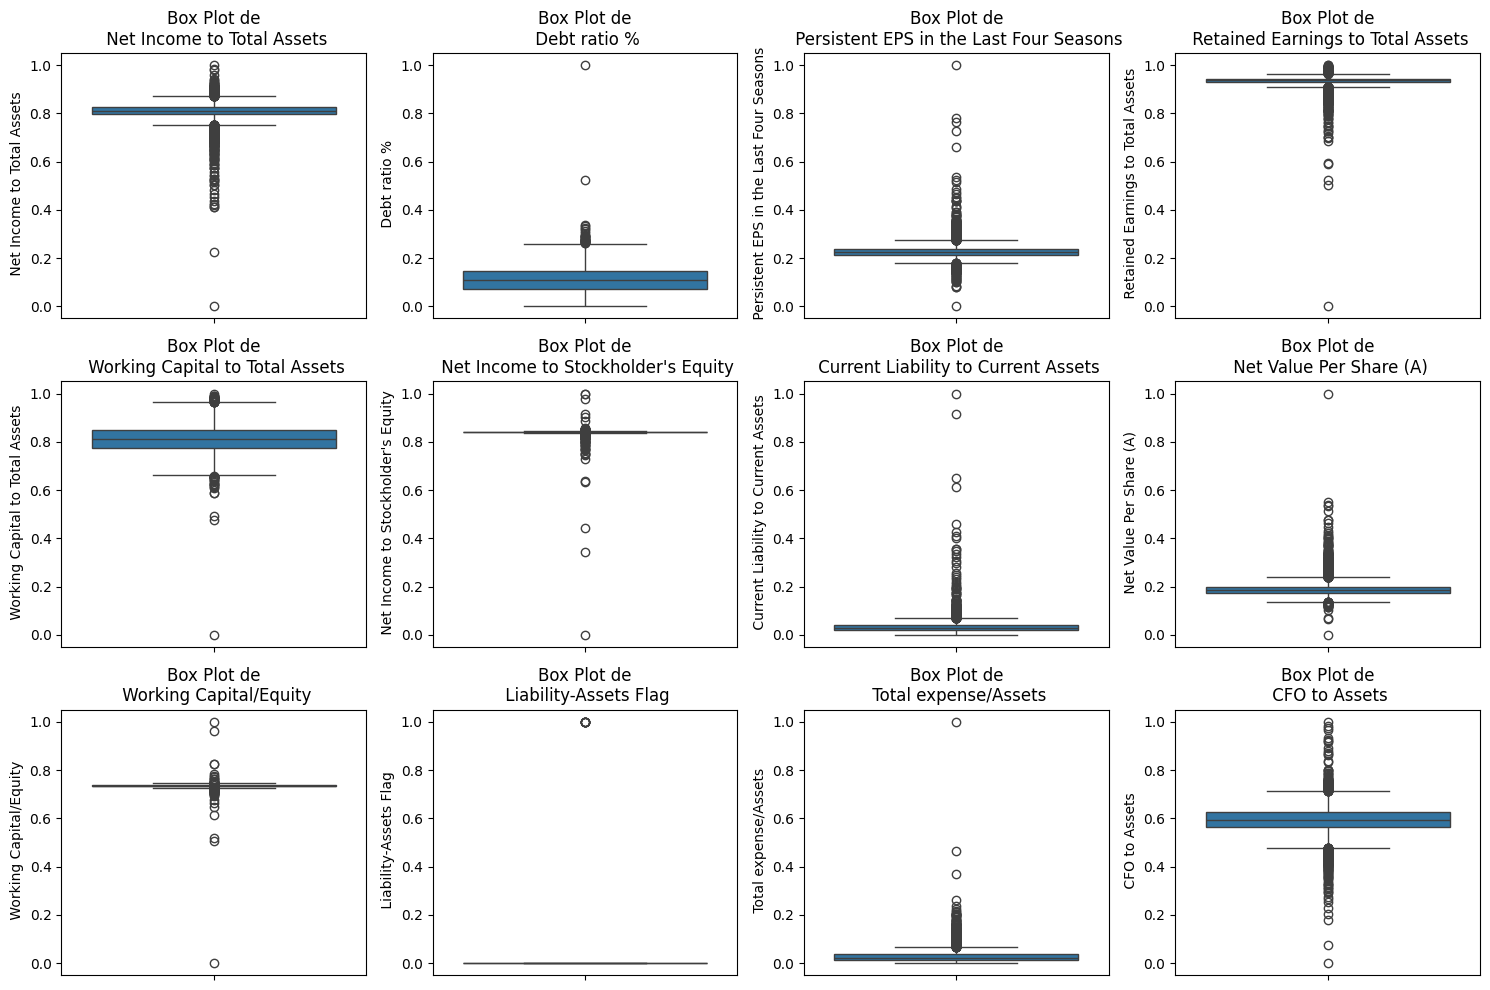

In [20]:
# Crear gráficos de caja
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_variables):
    plt.subplot(3, 4, i + 1)  # Cambiar a 3 filas y 4 columnas
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot de\n{col}')
plt.tight_layout()
plt.show()

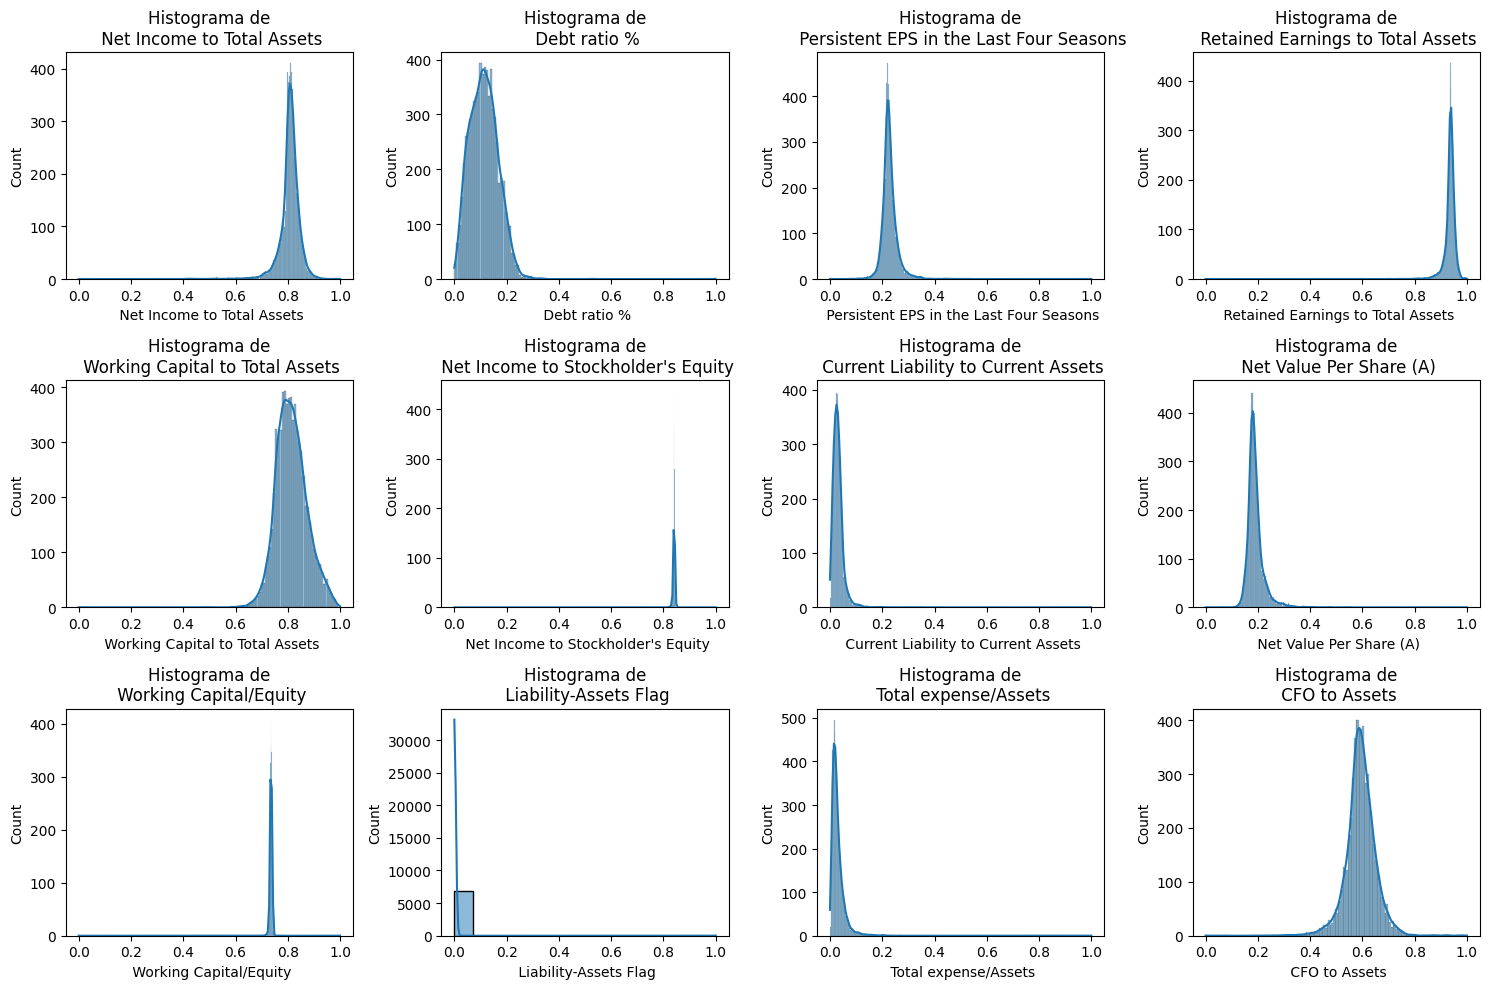

In [21]:
# Crear histogramas
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_variables):
    plt.subplot(3, 4, i + 1)  # Cambiar a 3 filas y 4 columnas
    sns.histplot(data[col], kde=True)  # kde=True para agregar la curva de densidad
    plt.title(f"Histograma de\n{col}")
plt.tight_layout()
plt.show()

#### Métodos Cuantitativos para la Detección de Outliers

Además de la visualización, usaremos métodos cuantitativos para identificar outliers de manera más objetiva.

##### Métodos Cuantitativos: IQR, Z-score y DBSCAN

El Rango Intercuartílico (IQR) es una medida robusta para detectar outliers.  El Z-score mide la desviación estándar de un punto de datos respecto a la media.  DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de agrupamiento que puede identificar outliers como puntos que no pertenecen a ningún grupo.

In [22]:
# Función para detectar outliers usando IQR
def detect_outliers_iqr(data, column, multiplier=1.5):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


# Función para detectar outliers usando Z-score
def detect_outliers_zscore(data, column, threshold=3):
    z = np.abs(stats.zscore(data[column]))
    outliers = data[z > threshold]
    return outliers

In [27]:
# Detectar outliers usando DBSCAN (requiere escalamiento de datos)
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)
outliers_dbscan = data[
    clusters == -1
]  # Los puntos que no pertenecen a ningun cluster son considerados outliers

print(f"Outliers usando DBSCAN:\n")
outliers_dbscan.head()

Outliers usando DBSCAN:



Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [68]:
# Detectar outliers en las columnas más significativas usando IQR y Z-score
for col in top_variables:
    outliers_iqr = detect_outliers_iqr(data, col)
    outliers_zscore = detect_outliers_zscore(data, col)
    print(f"Outliers en {col} usando IQR:\n{outliers_iqr}")
    print(f"Outliers en {col} usando Z-score:\n{outliers_zscore}")

Outliers en  Net Income to Total Assets usando IQR:
      Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
3             1                                           0.399844          
5             1                                           0.388680          
6             0                                           0.390923          
29            1                                           0.416126          
...         ...                                                ...          
6749          0                                           0.400331          
6751          0                                           0.624482          
6756          0                                           0.367523          
6761          0                                           0.400868          
6789          0                                           0.284941          

       ROA(A) before in

En esta primera parte hicimos exploración de datos, en la siguiente parte haremos la preparacion de los datos y el modelado. Desde aca vemos que tenemos demasiadas variables, sera necesario realizar PCA para reducir la dimensionalidad de los datos, y limpiar un poco las variables de los outliers, no necesitaremos imputación de datos, ya que no tenemos datos faltantes.